In [ ]:
# new code for data analysis

In [ ]:
xi = [1,3,2,5,4,4,3]
yi = [10,50,45,21,33,41,28]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ds = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset.csv', engine="python", header=0)
ds = pd.read_csv('./Dataset.csv', engine="python", header=0)

In [ ]:
ds.fillna(0)

,ONBOARD,VESSEL,POL,NATION,DESTINATION,20`,RATE,EX-RATE,O/FRT KRW,THC,W/F,D/FEE,SUM
0,2014-01-01,NYK PHOENIX 50E52,KRPUS,DNA,ESDNA,1,3260.0,1071.3,"3,492,438","115,000","4,350","30,000","3,641,788"
1,2014-01-01,HANJIN LOS ANGELES 0120E,KRPUS,NYC,USNYC,1,3980.0,1071.7,"4,252,232","115,000","4,350","30,000","4,401,582"
2,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,2720.0,1065.6,"2,917,472","116,000","4,350","30,000","3,067,822"
3,2014-01-02,VIENNA EXPRESS 25E52,KRPUS,CHI,USCHI,1,2780.0,1072.3,"2,980,994","115,000","4,350","30,000","3,130,344"
4,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,3100.0,1065.6,"3,303,360","232,000","4,350","30,000","3,569,710"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15509,2020-09-30,MOL TRADITION 012W,KRPUS,HEL,SEHEL,1,1150.0,1180.9,"1,358,035","130,000","4,420","50,000","1,542,455"
15510,2020-09-30,SONGYUNHE 2038W,KRPUS,TEM,GHTEM,1,1369.0,1175.8,"1,609,670","130,000","4,420","40,000","1,784,090"
15511,2020-09-30,MALIAKOS 2007E,KRPUS,VAN,CAVAN,1,3112.0,1181.7,"3,677,450","135,000","4,420","40,000","3,856,870"
15512,2020-09-30,NORTHERN JAMBOREE 038N,KRPUS,CHI,USCHI,1,3200.0,1171.3,"3,748,160","140,000",0,"45,000","3,933,160"


In [ ]:
destinations = sorted(set(ds["DESTINATION"]))
sum = []

In [ ]:
for key in destinations:
  temp = ds[ds["DESTINATION"] == key]
  tmp = 0
  for num in temp["SUM"]:
    tmp += int(num.replace(",",""))
  sum.append(tmp)

In [ ]:
sum_set = {name:value for name,value in zip(destinations,sum) }
sorted_dictionary = sorted(sum_set.items(), reverse=True, key=lambda item:item[1])

In [ ]:
print(sum[0])
print(destinations[0])
print(sum_set['AEAJM'])
print(sorted_dictionary[0][1])

11802048
AEAJM
11802048
3066275375


In [ ]:
name = []
total = []

In [ ]:
for key, value in sorted_dictionary:
  if(len(name) >= 10):
    break
  name.append(key)
  total.append(value)

In [ ]:
print(name)
print(total)

['USLGB', 'USNYC', 'USLAX', 'USDET', 'USHOU', 'USCHI', 'UYSTY', 'USOAK', 'USSAV', 'CATOR']
[3066275375, 2996944908, 2447180307, 2270220033, 2160248305, 2106181232, 874453526, 725223370, 680821697, 593331148]


In [ ]:
import copy

In [ ]:
overall = []
overall_number = []
lst = []
for i in range(81):
  lst.append(0)
for i in range(10):
  overall.append(copy.deepcopy(lst))
  overall_number.append(copy.deepcopy(lst))
print(lst)
# 2014-01 ~ 2020-09 ==> 12 + 12 + 12 + 12 + 12 + 12 + 9
# 2014-01 --> 0
# 2020-09 --> 80
# (year-2014) * 12 + month - 1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
counter = 0
for key in name:
  temp = ds[ds["DESTINATION"] == key]

  for column, row in temp.iterrows():
    position = (int(row["ONBOARD"][:4])-2014) * 12 + int(row["ONBOARD"][5:7]) - 1
    overall[counter][position] += int(row["SUM"].replace(",",""))
    overall_number[counter][position] += 1
  counter += 1

print(overall[0])
print(overall[1])
print(overall_number[0])
print(overall_number[1])

[74930382, 44390418, 55858594, 69003942, 48519314, 100851604, 111760982, 146330310, 163019388, 124630926, 125390576, 103071494, 48265586, 66734470, 130982940, 76708018, 80981928, 57248208, 76354782, 85045312, 86283230, 128922610, 116171962, 63096864, 92323536, 81263146, 54502296, 56011150, 99671234, 51826414, 63017846, 35630236, 26523176, 42174376, 3807386, 28488486, 28761634, 25364608, 14514740, 16696608, 41704826, 48538062, 13603172, 25471480, 42187928, 50382278, 76507442, 78292560, 61781308, 42739572, 68483762, 63956912, 53109690, 50332058, 59583974, 57420402, 83537070, 87826424, 125101268, 20102144, 93234282, 37847720, 59587004, 43029290, 46940924, 46118990, 50274506, 72776686, 72856196, 76366798, 73748186, 118341556, 36502844, 216478578, 120716034, 184758552, 70866130, 238608744, 226479932, 53961092, 137263662]
[34762188, 18106278, 50629972, 44857992, 52718846, 51056468, 43922468, 50232006, 32862952, 37869460, 39059540, 31362652, 41127064, 17634220, 35728816, 45785050, 47951680, 4

Start of Draw Graph <br>
Use it with change index number of overall, overall_number, name

In [ ]:
index_number = 9

In [ ]:
xi = []
for i in range(81):
  xi.append(i+1)
yi = overall[index_number]

label=[]
for j in range(7):
  for i in range(12):
    label.append(str(i+1))
    if(j == 6 and i==9):
      break

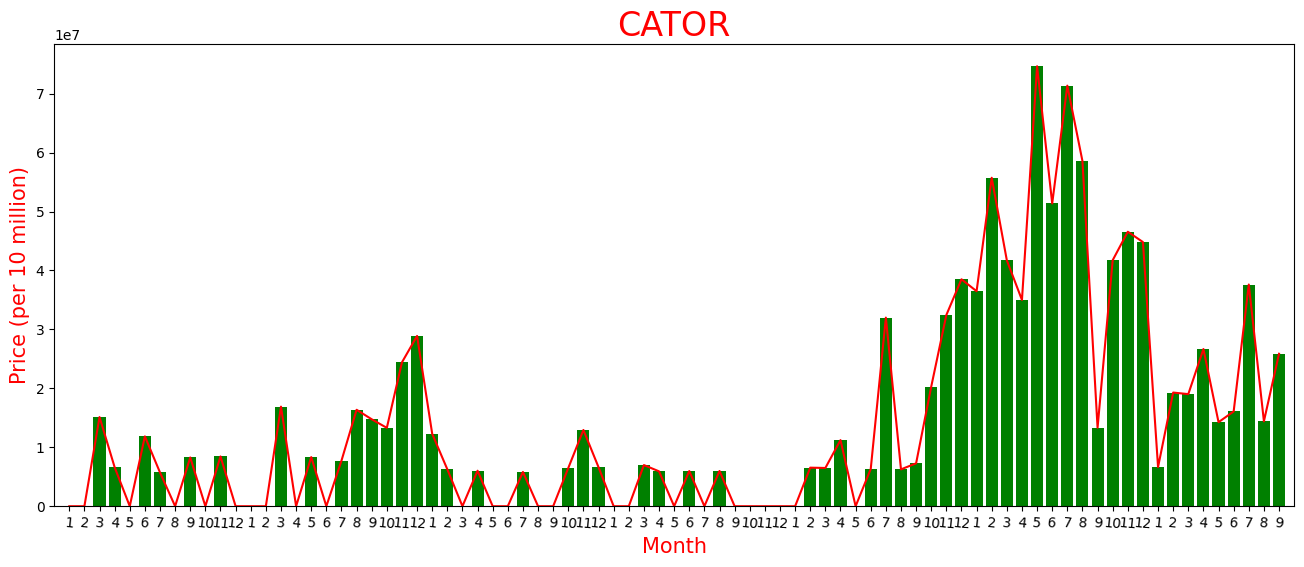

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(np.array(xi).reshape((-1, 1)), yi)
#y_pred = reg.predict(np.array(xi).reshape((-1, 1)))

#plt.scatter(xi, yi)
plt.figure(figsize=(16,6))

plt.xticks(xi, labels=label, rotation=-5)
plt.xlim(0,82)
plt.plot(xi, yi, color ='red')
plt.bar(xi, yi, color='green')
#plt.plot(xi, y_pred, color='red')

plt.title(name[index_number], fontdict={'size':24, 'color':'red'})
plt.xlabel('Month', fontdict={'size':15, 'color':'red'})
plt.ylabel('Price (per 10 million)', fontdict={'size':15, 'color':'red'})
plt.show()

In [ ]:
new_xi = []
new_yi = []
for i in range(81):
  new_xi.append(i+1)
for i in range(len(yi)):
  if overall_number[index_number][i] == 0:
    new_yi.append(0)
    continue
  new_yi.append(overall[index_number][i] / overall_number[index_number][i])
print(new_yi)

[0, 0, 3783075.0, 3308450.0, 0, 2963446.0, 2861752.0, 0, 4138130.0, 0, 4224175.0, 0, 0, 0, 4223860.0, 0, 4168230.0, 0, 3864460.0, 4091990.0, 3688125.0, 3324752.5, 3051851.25, 2889784.0, 3071380.0, 3131285.0, 0, 3011862.0, 0, 0, 2907460.0, 0, 0, 3246240.0, 3235492.5, 3308560.0, 0, 0, 3492510.0, 2959525.0, 0, 2985005.0, 0, 2991466.0, 0, 0, 0, 0, 0, 3271706.0, 3246116.0, 2804769.0, 0, 3163830.0, 3200450.6, 3126980.0, 3638533.0, 3381411.6666666665, 3244523.0, 3209094.5, 3040414.0, 3096467.111111111, 2980431.5714285714, 2916721.0, 3110838.0833333335, 3210832.125, 3243793.3636363638, 3254012.222222222, 3330890.0, 2981795.0, 3326971.5714285714, 3201716.4285714286, 3321801.0, 3214896.6666666665, 3169937.3333333335, 3333855.5, 3565831.0, 4021120.5, 3761874.2, 3603480.0, 4311797.333333333]


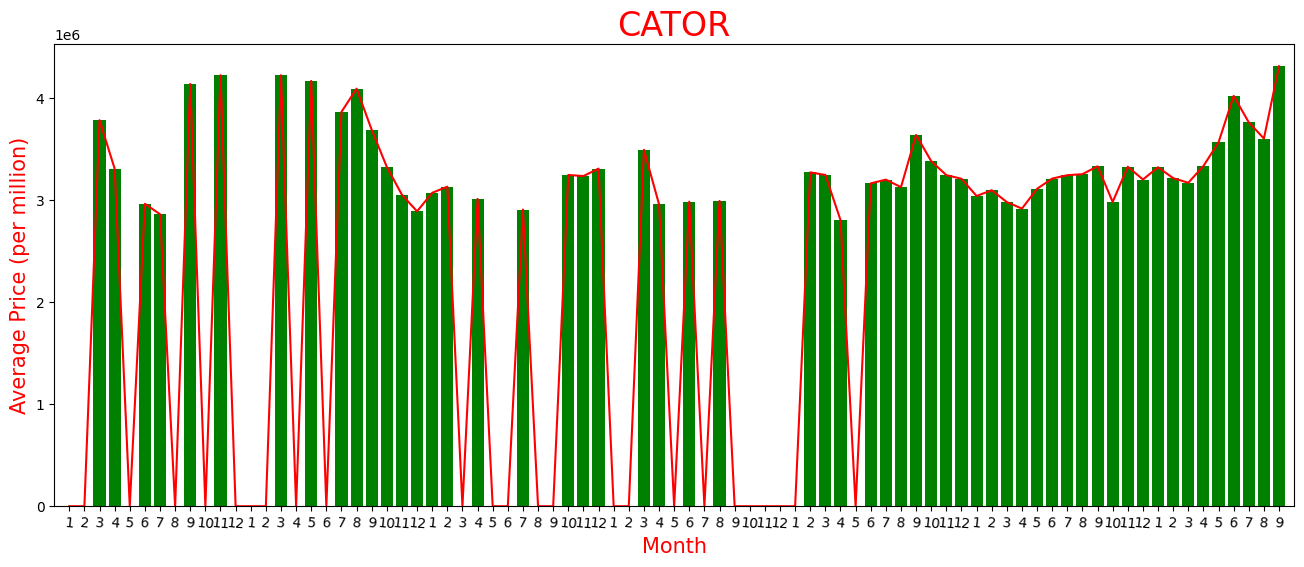

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(np.array(new_xi).reshape((-1, 1)), new_yi)
#new_y_pred = reg.predict(np.array(new_xi).reshape((-1, 1)))

#plt.scatter(new_xi, new_yi)
plt.figure(figsize=(16,6))
plt.xticks(xi, labels=label, rotation=-5)
plt.xlim(0,82)
plt.plot(new_xi, new_yi, color ='red')
plt.bar(new_xi, new_yi, color='green')
#plt.plot(new_xi, new_y_pred, color='red')

plt.title(name[index_number], fontdict={'size':24, 'color':'red'})
plt.xlabel('Month', fontdict={'size':15, 'color':'red'})
plt.ylabel('Average Price (per million)', fontdict={'size':15, 'color':'red'})
plt.show()